<a href="https://colab.research.google.com/github/okano700/IPO/blob/master/Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable,LpMinimize
import matplotlib.pyplot as plt
import numpy as np

     |████████████████████████████████| 40.6MB 100kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for amply: filename=amply-0.1.2-cp36-none-any.whl size=16573 sha256=53b85b692aaa28ec70afce108d6eea9bd7a9d9d3ec9110bb0173fa32439ec25b
  Stored in directory: /root/.cache/pip/wheels/84/18/f7/e5c3ed13ed5bb721763f77d4a924331d59ef115ce61c9d26eb
Successfully built amply


#Projeto 1


##Exercício 1
Em uma fazenda deseja-se fazer 10.000 Kg de ração com o menor custo
possível. De acordo com as recomendações do veterinário dos animais da fazenda, a mesma deve conter 15% de proteína, um mínimo de 8% de fibra, e no mínimo 1.100 calorias por quilo de ração e no máximo 2.250 calorias por quilo. Para se fazer a ração, estão disponíveis quatro ingredientes
cujas características técnico-econômicas estão mostrados na Tabela abaixo (dados são dados em %, exceto calorias e custo).



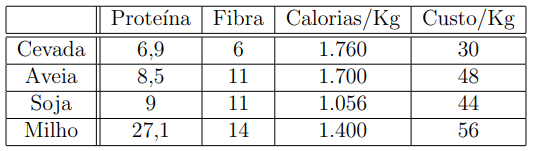

A ração deve ser feita contendo no mínimo 20% de milho e no máximo 12% de soja. Formule um modelo de Programação Linear para o problema.

###Resolução
$c$ = Cevada

$a$ = Aveia

$s$ = Soja

$m$ =  Milho

Minimizar:

$z = 30c + 48a + 44s + 56m$

sujeito a:

$0.15 =\frac{0.069c + 0.085a + 0.09s+ 0.271m}{c+a+s+m}$

$0.08 \leq \frac{0.06c + 0.11a + 0.11s+ 0.14m}{c+a+s+m}$

$1100 \leq \frac{1760c + 1700a + 1056s+ 1400m}{c+a+s+m} \leq2250$

$10000 = c+a+s+m$

$m \geq 2000$

$0 \leq s \leq 1200$

$a \geq 0$

$c \geq 0$



In [12]:
#Criando Modelo
model = LpProblem(name="Exercicio_1", sense=LpMinimize)

#Inicializando variaveis de decisão

c = LpVariable(name = "Cevada", lowBound=0)
a = LpVariable(name = "Aveia", lowBound=0) 
s = LpVariable(name = "Soja", lowBound=0)
m = LpVariable(name = "Milho", lowBound=0) 

#Adicionando as restriçoes ao modelo

model += ((0.069*c+0.085*a+ 0.09*s+0.271*m) == 0.15 * 10000 , "Proteína")
model += ((0.06*c+0.11*a+ 0.11*s+0.14*m)>= 0.08 * 10000, "Fibra")
model += ((1760*c+1700*a+ 1056*s+1400*m)>= 1100 * 10000, "minCal")
model += ((1760*c+1700*a+ 1056*s+1400*m)<= 2250 * 10000, "MaxCal")
model += (m >= 2000, "MinMilho")
model += (s <= 1200, "MaxSoja")
model += (c + a + s+ m ==  10000, "sum")



#Adicionando Função objetivo
model +=30*c+ 48*a + 44*s + 56*m

print(model)

#Aplicando solver
status = model.solve()
print(f"status: {model.status}, {LpStatus[model.status]}")

for name, constraint in model.constraints.items():
  print(f"{name}: {constraint.value()}")

print("\nVariaveis")
for var in model.variables():
  print(f"{var.name}: {var.value()}")



Exercicio_1:
MINIMIZE
48*Aveia + 30*Cevada + 56*Milho + 44*Soja + 0
SUBJECT TO
Proteína: 0.085 Aveia + 0.069 Cevada + 0.271 Milho + 0.09 Soja = 1500

Fibra: 0.11 Aveia + 0.06 Cevada + 0.14 Milho + 0.11 Soja >= 800

minCal: 1700 Aveia + 1760 Cevada + 1400 Milho + 1056 Soja >= 11000000

MaxCal: 1700 Aveia + 1760 Cevada + 1400 Milho + 1056 Soja <= 22500000

MinMilho: Milho >= 2000

MaxSoja: Soja <= 1200

sum: Aveia + Cevada + Milho + Soja = 10000

VARIABLES
Aveia Continuous
Cevada Continuous
Milho Continuous
Soja Continuous

status: 1, Optimal
Proteína: 2.000000222324161e-06
Fibra: 120.79208000000006
minCal: 5156435.64
MaxCal: -6343564.36
MinMilho: 2009.9009999999998
MaxSoja: -1200.0
sum: 0.0

Variaveis
Aveia: 0.0
Cevada: 5990.099
Milho: 4009.901
Soja: 0.0


##Exercicio 2

Uma empresa responsável pelo abastecimento semanal de um certo produto
ao Rio de Janeiro e a São Paulo, pretende estabelecer um plano de distribuição do produto a partir dos centros produtores situados em Belo Horizonte, Ribeirão Preto e São José dos Campos. As quantidades semanalmente disponíveis em Belo Horizonte, Ribeirão Preto e São José dos Campos são 70, 130 e 120 toneladas respectivamente. O consumo semanal previsto deste produto é de 180
toneladas no Rio de Janeiro e 140 toneladas em São Paulo. Os custos de transporte, em $/tonelada, de cada centro produtor para cada centro consumidor está dado abaixo:

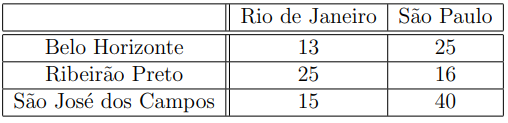

Considerando que o objetivo da empresa é minimizar seu custo total de transporte, formule um modelo de Programação Linear para o problema.

###Resolução

$RJ$ =  Rio de Janeiro

$SP$ = São Paulo

$BH$ =  Belo Horizonte

$RP$ =  Ribeirão Preto

$SJC$ = São José dos Campos

Minimizar

$13BHRJ + 25 BHSP + 25RPRJ + 16 RPSP
+ 15SJCRJ + 40SJCSP $

Sujeito a:

$BHRJ + BHSP \leq 70$

$RPRJ + RPSP \leq 130$

$SJCRJ + SJCSP \leq 120$

$BHRJ + RPRJ + SJCRJ = 180$

$BHSP +RPSP +SJCSP = 140$



In [13]:
#Criando Modelo
model = LpProblem(name="Exercicio2", sense=LpMinimize)

#Inicializando variaveis de decisão
#lowBound adicionamos o lowbound aqui pois nao podemos aplicar o metodo n de maneira negativa

bhrj = LpVariable(name = "BHRJ", lowBound=0)
bhsp = LpVariable(name = "BHSP", lowBound=0)
rprj = LpVariable(name = "RPRJ", lowBound=0)
rpsp = LpVariable(name = "RPSP", lowBound=0)
sjcrj = LpVariable(name = "SJCRJ", lowBound=0)
sjcsp = LpVariable(name = "SJCSP", lowBound=0)

#Adicionando as restriçoes ao modelo

model += (bhrj + bhsp <= 70, "maxBH")
model += (rprj + rpsp <= 130, "maxRP")
model += (sjcrj + sjcsp <= 120, "maxSJC")

model += (bhrj + rprj +sjcrj == 180, "demandaRJ")
model += (bhsp +rpsp + sjcsp == 140, "demandaSP")




#Adicionando Função objetivo
model += 13*bhrj + 25*bhsp + 25*rprj + 16*rpsp + 15*sjcrj + 40*sjcsp 

print(model)

#Aplicando solver
status = model.solve()
print(f"status: {model.status}, {LpStatus[model.status]}")

for name, constraint in model.constraints.items():
  print(f"{name}: {constraint.value()}")

for var in model.variables():
  print(f"{var.name}: {var.value()}")

Exercicio2:
MINIMIZE
13*BHRJ + 25*BHSP + 25*RPRJ + 16*RPSP + 15*SJCRJ + 40*SJCSP + 0
SUBJECT TO
maxBH: BHRJ + BHSP <= 70

maxRP: RPRJ + RPSP <= 130

maxSJC: SJCRJ + SJCSP <= 120

demandaRJ: BHRJ + RPRJ + SJCRJ = 180

demandaSP: BHSP + RPSP + SJCSP = 140

VARIABLES
BHRJ Continuous
BHSP Continuous
RPRJ Continuous
RPSP Continuous
SJCRJ Continuous
SJCSP Continuous

status: 1, Optimal
maxBH: 0.0
maxRP: 0.0
maxSJC: 0.0
demandaRJ: 0.0
demandaSP: 0.0
BHRJ: 60.0
BHSP: 10.0
RPRJ: 0.0
RPSP: 130.0
SJCRJ: 120.0
SJCSP: 0.0


##Exercicio3
Na produção de unidades de quatro tipos de produtos, são utilizadas duas
máquinas. O tempo utilizado na fabricaçãoo de cada unidade, de cada tipo de produto, em cada uma das duas máquinas, está dado da tabela abaixo.

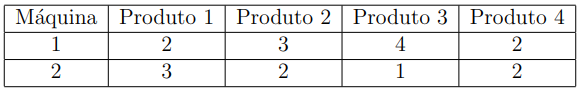

O custo total de produçãoo de uma unidade de cada produto é diretamente proporcional ao tempo de uso da máquina. Considere que o custo por hora para as máquinas 1 e 2 são \$10 e \$15 respectivamente. O total de horas disponíveis para todos os produtos nas máquinas 1 e 2 são 500 e 380 respectivamente. Se o preço de venda, por unidade, dos produtos 1, 2, 3 e 4 é de \$65, \$70, \$55 e $45,
formule o problema como um modelo de Programação Linear com o objetivo de maximizar o lucro líquido total.

###Resolução

Custos:

$m_1 = 10$

$m_2 = 15$ 

Preço de venda:

$p_1 = 65$

$p_2 = 70$

$p_3 = 55$

$p_4 = 45$

Tempo de funcionamento:

$m_1 = 500$

$m_2 = 380$

Maximizar:

$p_1m_1(65-20) + p_1m_2(65 - 45) + p_2m_1(70 - 30) + p_2m_2(70 - 30) + p_3m_1(55-40) + p_3m_2(55-15) + p_4m_1(45-20) + p_4m_2(45 - 30) $

Simplificando

$45p_1m_1 + 20p_1m_2 + 40p_2m_1 + 40p_2m_2 + 15p_3m_1 + 40p_3m_2 + 25p_4m_1 + 15p_4m_2$

Sujeito a:

$2p_1m_1 + 3p_2m_1 + 4p_3m_1 + 2p_4m_1 \leq 500$

$3p_1m_2 + 2p_2m_2 + p_3m_2 + 2p_4m_2 \leq 380$

In [14]:
#Criando Modelo
model = LpProblem(name="Exercicio3", sense=LpMaximize)

#Inicializando variaveis de decisão
#lowBound adicionamos o lowbound aqui pois nao podemos aplicar o metodo n de maneira negativa

p1m1 = LpVariable(name = "p1m1", lowBound=0)
p1m2 = LpVariable(name = "p1m2", lowBound=0)
p2m1 = LpVariable(name = "p2m1", lowBound=0)
p2m2 = LpVariable(name = "p2m2", lowBound=0)
p3m1 = LpVariable(name = "p3m1", lowBound=0)
p3m2 = LpVariable(name = "p3m2", lowBound=0)
p4m1 = LpVariable(name = "p4m1", lowBound=0)
p4m2 = LpVariable(name = "p4m2", lowBound=0)


#Adicionando as restriçoes ao modelo

model += (2*p1m1+3*p2m1+4*p3m1+2*p4m1 <= 500, "maxM1")
model += (3*p1m2+2*p2m2+p3m2+2*p4m2 <= 380, "maxM2")


#Adicionando Função objetivo
model += 45*p1m1+20*p1m2+40*p2m1+40*p2m2+15*p3m1+40*p3m2+25*p4m1+15*p4m2

print(model)

#Aplicando solver
status = model.solve()
print(f"status: {model.status}, {LpStatus[model.status]}")

for name, constraint in model.constraints.items():
  print(f"{name}: {constraint.value()}")

for var in model.variables():
  print(f"{var.name}: {var.value()}")

Exercicio3:
MAXIMIZE
45*p1m1 + 20*p1m2 + 40*p2m1 + 40*p2m2 + 15*p3m1 + 40*p3m2 + 25*p4m1 + 15*p4m2 + 0
SUBJECT TO
maxM1: 2 p1m1 + 3 p2m1 + 4 p3m1 + 2 p4m1 <= 500

maxM2: 3 p1m2 + 2 p2m2 + p3m2 + 2 p4m2 <= 380

VARIABLES
p1m1 Continuous
p1m2 Continuous
p2m1 Continuous
p2m2 Continuous
p3m1 Continuous
p3m2 Continuous
p4m1 Continuous
p4m2 Continuous

status: 1, Optimal
maxM1: 0.0
maxM2: 0.0
p1m1: 250.0
p1m2: 0.0
p2m1: 0.0
p2m2: 0.0
p3m1: 0.0
p3m2: 380.0
p4m1: 0.0
p4m2: 0.0


##Exercicio4

Uma companhia de aviação está considerando a compra de aviões de passageiros de 3 tipos: de pequeno curso, de curso médio e de longo curso. O preço de compra seria de \$6,7M para cada avião de longo curso, \$5M para aviões de médio curso e \$3,5M para aviões de pequeno curso. A diretoria autorizou um gasto máximo de \$150M para estas compras, independentemente de quais aviões serão comprados. As viagens aéreas em todos os tipos de aviões, fazem prever que os aviões andarão sempre lotados. Estima-se que o lucro anual líquido seria de \$0,42M para cada avião de longo curso, \$0,30M para avião de médio curso e \$0,23M para avião de pequeno curso. A companhia terá pilotos treinados para pilotar 30 novos aviões. Se somente aviões de pequeno curso forem comprados, a divisão de manutenção estaria apta a manter 40 novos aviões. Cada avião de médio curso gasta 1/3 a mais de manutenção do que o dispendido por um avião de
pequeno curso e o de longo curso 2/3 a mais. As informações acima foram obtidas por uma análise preliminar do problema. Uma análise mais detalhada será feita posteriormente. No entanto, usando os dados acima como uma primeira aproximação, a diretoria da empresa deseja conhecer quantos aviões de cada tipo deveriam ser comprados se o objetivo é maximizar o lucro. Formule um modelo
de Programação Linear para este problema. (M = 1.000.000)

###Resolução

$c$ =  curto = 3.5

$m$ = médio = 5

$l$ = longo = 6.7


Maximizar:

$0.42l + 0.3m + 0.23c$

Sujeito a:

$3.5c + 5m + 6.7l \leq 150$

$l+m+c <= 30$

$c+\frac{4}{3}m+\frac{5}{3}l \leq 40$

In [15]:
#Criando Modelo
model = LpProblem(name="Exercicio4", sense=LpMaximize)

#Inicializando variaveis de decisão
#lowBound adicionamos o lowbound aqui pois nao podemos aplicar o metodo n de maneira negativa

c = LpVariable(name = "curto",cat='Integer', lowBound=0)
m = LpVariable(name = "medio",cat='Integer', lowBound=0)
l = LpVariable(name = "longo",cat='Integer', lowBound=0)



#Adicionando as restriçoes ao modelo

model += (3.5*c + 5*m + 6.7*l <= 150, "GastoMax")
model += (l+m+c <= 30, "NPilotos")
model += (c+ (4/3)* m + (5/3) * l <= 40, "Manutenção")


#Adicionando Função objetivo
model += 0.42*l + 0.3*m + 0.23*c

print(model)

#Aplicando solver
status = model.solve()
print(f"status: {model.status}, {LpStatus[model.status]}")

for name, constraint in model.constraints.items():
  print(f"{name}: {constraint.value()}")

for var in model.variables():
  print(f"{var.name}: {var.value()}")

Exercicio4:
MAXIMIZE
0.23*curto + 0.42*longo + 0.3*medio + 0.0
SUBJECT TO
GastoMax: 3.5 curto + 6.7 longo + 5 medio <= 150

NPilotos: curto + longo + medio <= 30

Manutenção: curto + 1.66666666667 longo + 1.33333333333 medio <= 40

VARIABLES
0 <= curto Integer
0 <= longo Integer
0 <= medio Integer

status: 1, Optimal
GastoMax: -0.20000000000000284
NPilotos: 0.0
Manutenção: -0.6666666666666643
curto: 16.0
longo: 14.0
medio: 0.0


##Exercicio5

Uma empresa tem 3 fábricas com ociosidade na produção. Todas as 3 fábricas
tem capacidade de produzir um certo produto e a gerência decidiu usar uma parte da ociosidade na produção deste produto. O produto pode ser feito em 3 tamanhos: grande, médio e pequeno, que dão um lucro líquido de \$12, \$10 e \$9 respectivamente. As fábricas 1, 2 e 3 tem capacidade de fabricar 500, 600 e 300 unidades do produto respectivamente, independentemente do tamanho a
ser produzido. Há, no entanto, limitação do espaço para estocagem. As fábricas 1, 2 e 3 tem 9000, 8000 e 3500 m2 de área para estocagem respectivamente. Cada unidade de tamanho grande, médio e pequeno necessita de 20, 15 e 12 m2 respectivamente. O Departamento de Vendas indicou que 600, 800 e 500 unidades dos tamanhos grande, médio e pequeno, respectivamente, podem ser vendidas
por dia. De maneira a manter uma certa uniformidade, a gerência decidiu que a percentagem do uso das capacidades ociosas das 3 fábricas devem ser iguais. A gerência deseja saber quanto de cada tamanho deve ser produzido em cada fábrica de maneira que o lucro seja máximo. Formule um modelo de Programação Linear para este problema.

###Resolução

$p_{f1}$ = produto pequeno fabricado na fabrica 1

$p_{f2}$ = produto pequeno fabricado na fabrica 2

$p_{f3}$ = produto pequeno fabricado na fabrica 3

$m_{f1}$ = produto medio fabricado na fabrica 1

$m_{f2}$ = produto medio fabricado na fabrica 2

$m_{f3}$ = produto medio fabricado na fabrica 3

$g_{f1}$ = produto grande fabricado na fabrica 1

$g_{f2}$ = produto grande fabricado na fabrica 2

$g_{f3}$ = produto grande fabricado na fabrica 3

maximizar:

$9(p_{f1}+p_{f2}+p_{f3}) + 10(m_{f1}+m_{f2}+m_{f3}) + 12(g_{f1}+g_{f2}+g_{f3})$

Sujeito a:

$p_{f1}+p_{f2}+p_{f3} \leq 500$

$m_{f1}+m_{f2}+m_{f3} \leq 800$

$g_{f1}+g_{f2}+g_{f3} \leq 600$

$12p_{f1} + 15m_{f1} + 20g_{f1} \leq 9000$

$12p_{f2} + 15m_{f2} + 20g_{f2} \leq 8000$

$12p_{f3} + 15m_{f3} + 20g_{f3} \leq 3500$

$p_{f1} + m_{f1} + g_{f1} \leq 500$

$p_{f2} + m_{f2} + g_{f2} \leq 600$

$p_{f3} + m_{f3} + g_{f3} \leq 300$

$\frac{p_{f1} + m_{f1} + g_{f1} }{500} = \frac{p_{f2} + m_{f2} + g_{f2}}{600} = \frac{p_{f3} + m_{f3} + g_{f3}}{300}$



In [16]:
#Criando Modelo
model = LpProblem(name="Exercicio5", sense=LpMaximize)

#Inicializando variaveis de decisão
#lowBound adicionamos o lowbound aqui pois nao podemos aplicar o metodo n de maneira negativa

pf1 = LpVariable(name = "pequenoFabrica1",cat='Integer', lowBound=0)
pf2 = LpVariable(name = "pequenoFabrica2",cat='Integer', lowBound=0)
pf3 = LpVariable(name = "pequenoFabrica3",cat='Integer', lowBound=0)

mf1 = LpVariable(name = "medioFabrica1",cat='Integer', lowBound=0)
mf2 = LpVariable(name = "medioFabrica2",cat='Integer', lowBound=0)
mf3 = LpVariable(name = "medioFabrica3",cat='Integer', lowBound=0)

gf1 = LpVariable(name = "grandeFabrica1",cat='Integer', lowBound=0)
gf2 = LpVariable(name = "grandeFabrica2",cat='Integer', lowBound=0)
gf3 = LpVariable(name = "grandeFabrica3",cat='Integer', lowBound=0)


#Adicionando as restriçoes ao modelo

model += (pf1+pf2+pf3 <= 500, "DemandaPequeno")
model += (mf1+mf2+mf3 <= 800, "DemandaMedio")
model += (gf1+gf2+gf3 <= 600, "DemandaGrande")

model += (12*pf1+15*mf1+20*gf1 <= 9000, "ArmazenamentoFabrica1")
model += (12*pf2+15*mf2+20*gf2 <= 8000, "ArmazenamentoFabrica2")
model += (12*pf3+15*mf3+20*gf3 <= 3500, "ArmazenamentoFabrica3")

model += (pf1+mf1+gf1 <= 500, "ProduçãoFabrica1")
model += (pf2+mf2+gf2 <= 600, "ProduçãoFabrica2")
model += (pf3+mf3+gf3 <= 300, "ProduçãoFabrica3")

model += ((pf1+mf1+gf1)/500 == (pf2+mf2+gf2)/600, "%fabrica1 fabrica2")
model += ((pf3+mf3+gf3)/300 == (pf2+mf2+gf2)/600, "%fabrica3 fabrica2")


#Adicionando Função objetivo
model += 9*(pf1+pf2+pf3)+10*(mf1+mf2+mf3)+12*(gf1+gf2+gf3)

print(model)

#Aplicando solver
status = model.solve()
print(f"status: {model.status}, {LpStatus[model.status]}")

for name, constraint in model.constraints.items():
  print(f"{name}: {constraint.value()}")

for var in model.variables():
  print(f"{var.name}: {var.value()}")

Exercicio5:
MAXIMIZE
12*grandeFabrica1 + 12*grandeFabrica2 + 12*grandeFabrica3 + 10*medioFabrica1 + 10*medioFabrica2 + 10*medioFabrica3 + 9*pequenoFabrica1 + 9*pequenoFabrica2 + 9*pequenoFabrica3 + 0
SUBJECT TO
DemandaPequeno: pequenoFabrica1 + pequenoFabrica2 + pequenoFabrica3 <= 500

DemandaMedio: medioFabrica1 + medioFabrica2 + medioFabrica3 <= 800

DemandaGrande: grandeFabrica1 + grandeFabrica2 + grandeFabrica3 <= 600

ArmazenamentoFabrica1: 20 grandeFabrica1 + 15 medioFabrica1
 + 12 pequenoFabrica1 <= 9000

ArmazenamentoFabrica2: 20 grandeFabrica2 + 15 medioFabrica2
 + 12 pequenoFabrica2 <= 8000

ArmazenamentoFabrica3: 20 grandeFabrica3 + 15 medioFabrica3
 + 12 pequenoFabrica3 <= 3500

ProduçãoFabrica1: grandeFabrica1 + medioFabrica1 + pequenoFabrica1 <= 500

ProduçãoFabrica2: grandeFabrica2 + medioFabrica2 + pequenoFabrica2 <= 600

ProduçãoFabrica3: grandeFabrica3 + medioFabrica3 + pequenoFabrica3 <= 300

%fabrica1_fabrica2: 0.002 grandeFabrica1 - 0.00166666666667 grandeFabrica2


##Exercicio6
Um investidor pode investir dinheiro em duas atividades A e B disponíveis no
início dos próximos 5 anos. Cada \$1 investido em A no começo de um ano retorna \$1,40 (um lucro de \$0,40) dois anos mais tarde (a tempo de imediato reinvestimento). Cada \$1 investido em B no início de um ano retorna \$1,70, três anos mais tarde. Existem ainda 2 atividades C e D que estarão
disponíveis no futuro. Cada $1 investido em C no início do segundo ano retorna \$2,00, quatro anos mais tarde. Cada \$1 investido em D no começo do quinto ano, retorna \$1,30 um ano mais tarde. O investidor tem \$10.000. Ele deseja conhecer como investir de maneira a maximizar a quantidade de dinheiro acumulado no início do sexto ano. 
Formule um modelo de Programação Linear para este problema. Considere que não há inflação.

###Resolução
Variaveis:
$v_{ti}$
$r_{t}$


Maximizar:

$2v_{c2} + 1.7v_{b3} + 1.4v_{a4} +1.3v_{d5} + r_5$

sujeito a:

$v_{a1} + v_{b1} + r_{1} = 10000$

$v_{a2} + v_{b2} + v_{c2} + r_2 = r_1 $

$v_{a3} + v_{b3} + r_3 = r_2 + 1.4v_{a1}$

$$

TypeError: ignored

##Exercicio 11
O departamento de marketing de uma empresa estuda a forma mais econômica
de aumentar em 30% as vendas de seus dois produtos P1 e P2. As alternativas são:

* Investir em um programa institucional com outras empresas do mesmo ramo. Esse programa deve proporcionar um aumento de 3% nas vendas de cada produto, para cada \$1.000,00 investidos.

* Investir diretamente na divulgação dos produtos. Cada \$1.000.00 investidos em P1 retornam um aumento de 4% nas vendas, enquanto que para P2 o retorno  ́e de 10%.

A empresa dispõe de $10.000, 00 para esse empreendimento. Quanto deverá destinar a cada
atividade? Formule o problema como um modelo de Programação Linear.

###Resolução

Variaveis:
$I_{PI}$ = Investimento em programa institucional

$ID_{p1}$ = Investimento na divulgação do produto 1

$ID_{p2}$ = Investimento na divulgação do produto 2

minimizar:

$I_{PI} + ID_{p1} + ID_{p2}$

sujeito a:

$\frac{0.03I_{PI} + 0.04ID_{p1}}{1000}  \geq 0.30$

$\frac{0.03I_{PI} + 0.1ID_{p3}}{1000}  \geq 0.30$

$I_{PI} + ID_{p1} + ID_{p2} \leq 10000$

In [ ]:
#Criando Modelo
model = LpProblem(name="Exercicio4", sense=LpMinimize)

#Inicializando variaveis de decisão
#lowBound adicionamos o lowbound aqui pois nao podemos aplicar o metodo n de maneira negativa

ipi = LpVariable(name = "investimento em programa institucional", lowBound=0)
idp1 = LpVariable(name = "Investimento na divulgação do produto 1", lowBound=0)
idp2 = LpVariable(name = "Investimento na divulgação do produto 2", lowBound=0)



#Adicionando as restriçoes ao modelo

model += (0.03*ipi + 0.04*idp1 >= 0.3*1000, "produto 1")
model += (0.03*ipi + 0.1*idp2 >= 0.3*1000, "produto2")
model += (ipi+ idp1+idp2 <= 10000, "gastoMax")


#Adicionando Função objetivo
model += ipi+idp2+idp2

print(model)

#Aplicando solver
status = model.solve()
print(f"status: {model.status}, {LpStatus[model.status]}")

for name, constraint in model.constraints.items():
  print(f"{name}: {constraint.value()}")

for var in model.variables():
  print(f"{var.name}: {var.value()}")